In [3]:
# install seaborn if it's not available in the environment
%pip install seaborn

import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
df = pd.read_csv("dataset.csv")
X = df[["ph", "temperature", "humidity", "flow", "turbidity", "tds"]]
y = df["biofilm_risk_percent"]

In [5]:
# ===============================
# TRAIN TEST SPLIT
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
# ===============================
# RANDOM FOREST REGRESSOR
# ===============================
rf_reg = RandomForestRegressor(
    n_estimators=300,
    max_depth=14,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_reg.fit(X_train, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,14
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
# ===============================
# SAVE MODEL
# ===============================
joblib.dump(rf_reg, "biofilm_risk_rf_regressor.pkl")

['biofilm_risk_rf_regressor.pkl']

In [8]:
# ===============================
# PREDICTION
# ===============================
y_pred = rf_reg.predict(X_test)


In [9]:
# ===============================
# METRICS
# ===============================
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

MAE : 5.389956467027059
MSE : 54.230171783814
RMSE: 7.364113781291948
R²  : 0.8511883620556459


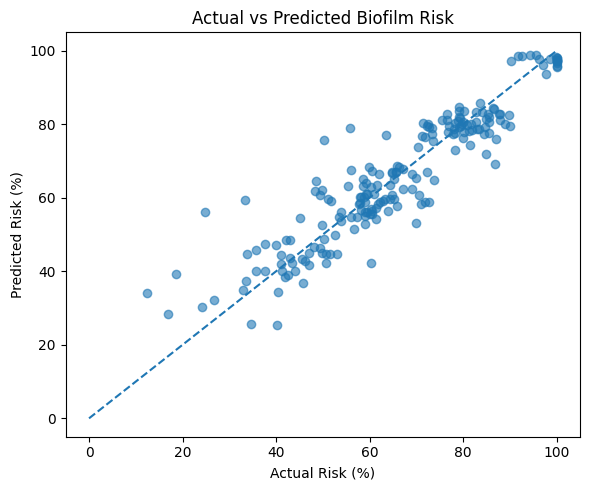

In [10]:
# ===============================
# ACTUAL vs PREDICTED
# ===============================
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([0, 100], [0, 100], linestyle="--")
plt.xlabel("Actual Risk (%)")
plt.ylabel("Predicted Risk (%)")
plt.title("Actual vs Predicted Biofilm Risk")
plt.tight_layout()
plt.show()

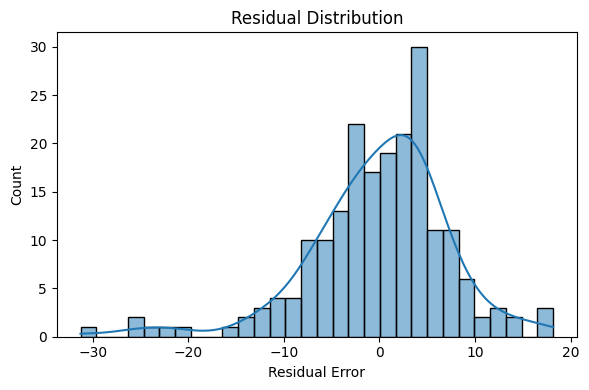

In [11]:
# ===============================
# RESIDUAL PLOT
# ===============================
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residual Error")
plt.title("Residual Distribution")
plt.tight_layout()
plt.show()

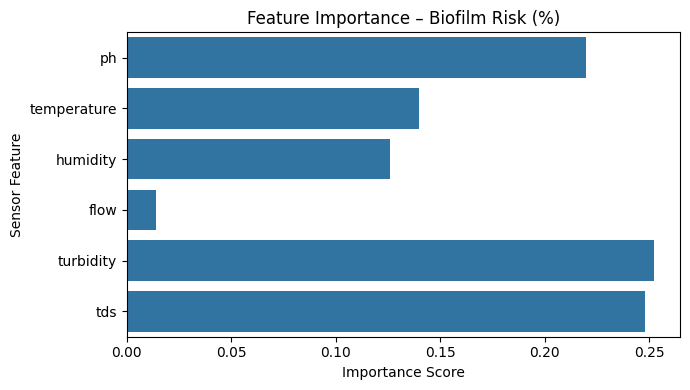

In [12]:
# ===============================
# FEATURE IMPORTANCE
# ===============================
importance = rf_reg.feature_importances_

plt.figure(figsize=(7, 4))
sns.barplot(x=importance, y=X.columns)
plt.title("Feature Importance – Biofilm Risk (%)")
plt.xlabel("Importance Score")
plt.ylabel("Sensor Feature")
plt.tight_layout()
plt.show()